In [ ]:
!pip install --upgrade gupload
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

auth.authenticate_user()
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/final_version_with_avg_distances_and_counts.csv')
for_EDA = pd.read_csv('/content/gdrive/My Drive/FINAL_injuries_post2013.csv')
for_EDA=for_EDA.drop(['Unnamed: 0','Unnamed: 0.1','Acquired'],axis=1)

def injury_history_dur(row):
  injured_part = row['Injury Part']
  injury_history_duration = row[injured_part]
  return injury_history_duration
df['injured body part history'] = df.apply(lambda ro:injury_history_dur(ro), axis=1)
def injury_history_count(row):
  injured_part = row['Injury Part']
  injury_history_count = row[injured_part + '_count']
  return injury_history_count
df['injured body part count'] = df.apply(lambda ro:injury_history_count(ro), axis=1)
df = df[df['Acute-Chronic Workload Ratio']!= 0]

Requirement already up-to-date: gupload in /usr/local/lib/python3.7/dist-packages (1.1.0)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def get_body_part_injury_count_range(row):
  body_part_count = row['injured body part count']
  mask1 = body_part_count<1
  mask2 = body_part_count <=3
  mask3 = body_part_count <= 5
  mask4 = body_part_count>5
  if mask1:
    return 'No injury history'
  elif (not mask1) and mask2:
    return 'Mild'
  elif (not mask2) and mask3:
    return 'Moderate'
  elif mask4:
    return 'Serious'
df['body part inj count range'] = df.apply(lambda ro:get_body_part_injury_count_range(ro), axis=1)

def get_body_part_injury_duration_range(row):
  body_part_durr = row['injured body part history']
  mask1 = body_part_durr<29
  mask2 = body_part_durr <=90
  mask3 = body_part_durr <= 180
  mask4 = body_part_durr>180
  if mask1:
    return 'Little-No injury history'
  elif (not mask1) and mask2:
    return 'Mild'
  elif (not mask2) and mask3:
    return 'Moderate'
  elif mask4:
    return 'Serious'
df['body part inj duration range'] = df.apply(lambda ro:get_body_part_injury_duration_range(ro), axis=1)


def get_total_injury_count_range(row):
  body_part_count = row['Total num. of inj']
  mask1 = body_part_count<1
  mask2 = body_part_count <=3
  mask3 = body_part_count <= 5
  mask4 = body_part_count>5
  if mask1:
    return 'No injury history'
  elif (not mask1) and mask2:
    return 'Mild'
  elif (not mask2) and mask3:
    return 'Moderate'
  elif mask4:
    return 'Serious'
df['Total inj count range'] = df.apply(lambda ro:get_total_injury_count_range(ro), axis=1)

def get_total_injury_duration_range(row):
  body_part_durr = row['Total Duration']
  mask1 = body_part_durr<29
  mask2 = body_part_durr <=90
  mask3 = body_part_durr <= 180
  mask4 = body_part_durr>180
  if mask1:
    return 'Little-No injury history'
  elif (not mask1) and mask2:
    return 'Mild injury history'
  elif (not mask2) and mask3:
    return 'Moderate injury history'
  elif mask4:
    return 'Serious injury history'
df['Total inj duration range'] = df.apply(lambda ro:get_total_injury_duration_range(ro), axis=1)

  body part inj count range     0
0         No injury history   231
1                      Mild  1239
2                  Moderate   182
3                   Serious   108


Text(0.5, 1.0, "Number of Injuries based on body part's injury history (count)")

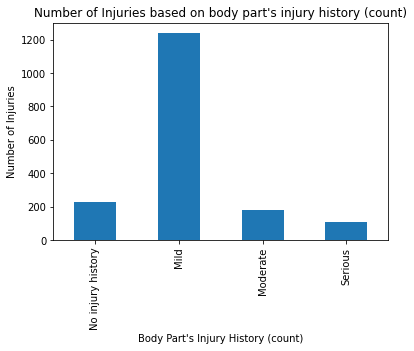

In [ ]:
####### Body Part Specific - body part inj count range & body part inj duration range

df_copy = df.copy()
body_part_count_numofinj = df_copy.groupby(['body part inj count range']).size()
body_part_count_numofinj = body_part_count_numofinj.to_frame()
body_part_count_numofinj = body_part_count_numofinj.reset_index()
body_part_count_numofinj_copy = body_part_count_numofinj.copy()

body_part_count_numofinj.iloc[0],body_part_count_numofinj.iloc[1],body_part_count_numofinj.iloc[2] = body_part_count_numofinj_copy.iloc[2],body_part_count_numofinj_copy.iloc[0],body_part_count_numofinj_copy.iloc[1]
print(body_part_count_numofinj)
body_part_count_numofinj_plot = body_part_count_numofinj.plot(x = 'body part inj count range', y = 0, kind='bar', legend = False)
body_part_count_numofinj_plot.set_xlabel('''Body Part's Injury History (count)''')
body_part_count_numofinj_plot.set_ylabel('Number of Injuries')
body_part_count_numofinj_plot.set_title('''Number of Injuries based on body part's injury history (count)''')

  body part inj duration range     0
0     Little-No injury history  1424
1                         Mild   181
2                     Moderate    48
3                      Serious   107


Text(0.5, 1.0, "Number of Injuries based on body part's injury history (duration)")

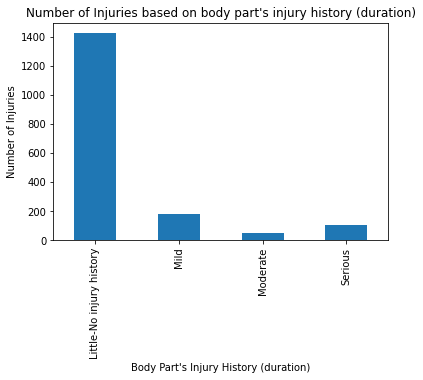

In [ ]:
df_copy = df.copy()
body_part_duration_numofinj = df_copy.groupby(['body part inj duration range']).size()


body_part_duration_numofinj = body_part_duration_numofinj.to_frame()
body_part_duration_numofinj = body_part_duration_numofinj.reset_index()
body_part_duration_numofinj_copy = body_part_duration_numofinj.copy()

print(body_part_duration_numofinj)
body_part_duration_numofinj_plot = body_part_duration_numofinj.plot(x = 'body part inj duration range', y = 0, kind='bar', legend = False)
body_part_duration_numofinj_plot.set_xlabel('''Body Part's Injury History (duration)''')
body_part_duration_numofinj_plot.set_ylabel('Number of Injuries')
body_part_duration_numofinj_plot.set_title('''Number of Injuries based on body part's injury history (duration)''')

  body part inj count range  Injury Duration
0                      Mild        29.577078
1                  Moderate        37.851648
2         No injury history        20.597403
3                   Serious        37.759259


Text(0.5, 1.0, "Average Injury Duration based on body part's injury history (count)")

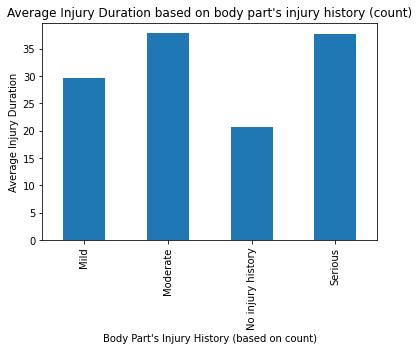

In [ ]:
df = df.copy()
body_part_count_dur = df_copy.groupby(['body part inj count range'])['Injury Duration'].mean()


body_part_count_dur = body_part_count_dur.to_frame()
body_part_count_dur = body_part_count_dur.reset_index()
body_part_count_dur_copy = body_part_count_dur.copy()

# body_part_count_dur.iloc[0],body_part_count_dur.iloc[1],body_part_count_dur.iloc[2] = body_part_count_dur_copy.iloc[2],body_part_count_dur_copy.iloc[0],body_part_count_dur_copy.iloc[1]
print(body_part_count_dur)
body_part_count_dur_plot = body_part_count_dur.plot(x = 'body part inj count range', y = 'Injury Duration', kind='bar', legend = False)

body_part_count_dur_plot.set_xlabel('''Body Part's Injury History (based on count)''')
body_part_count_dur_plot.set_ylabel('Average Injury Duration')
body_part_count_dur_plot.set_title('''Average Injury Duration based on body part's injury history (count)''')

Text(0.5, 1.0, "Average Injury Duration based on body part's injury history (duration)")

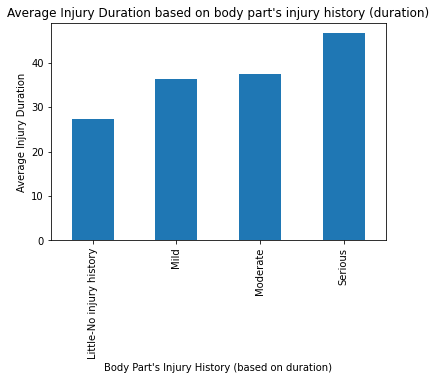

In [ ]:
df_copy = df.copy()
body_part_duration_dur = df_copy.groupby(['body part inj duration range'])['Injury Duration'].mean()


body_part_duration_dur = body_part_duration_dur.to_frame()
body_part_duration_dur = body_part_duration_dur.reset_index()
body_part_duration_dur_copy = body_part_duration_dur.copy()

body_part_duration_dur_plot = body_part_duration_dur.plot(x = 'body part inj duration range', y = 'Injury Duration', kind='bar', legend = False)

body_part_duration_dur_plot.set_xlabel('''Body Part's Injury History (based on duration)''')
body_part_duration_dur_plot.set_ylabel('Average Injury Duration')
body_part_duration_dur_plot.set_title('''Average Injury Duration based on body part's injury history (duration)''')

Text(0.5, 1.0, 'Number of Injuries based on total injury history (count)')

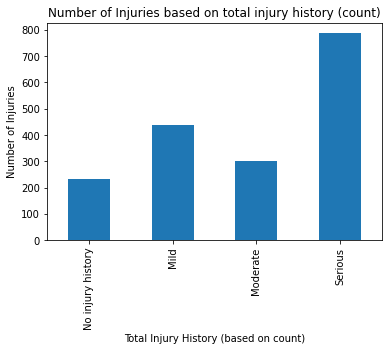

In [ ]:
####### Total Injury History - Total inj count range & Total inj duration range

df_copy = df.copy()
total_count_numofinj = df_copy.groupby(['Total inj count range']).size()

total_count_numofinj = total_count_numofinj.to_frame()
total_count_numofinj = total_count_numofinj.reset_index()
total_count_numofinj_copy = total_count_numofinj.copy()

total_count_numofinj.iloc[0],total_count_numofinj.iloc[1],total_count_numofinj.iloc[2] = total_count_numofinj_copy.iloc[2],total_count_numofinj_copy.iloc[0],total_count_numofinj_copy.iloc[1]
total_count_numofinj_plot = total_count_numofinj.plot(x = 'Total inj count range', y = 0, kind='bar', legend = False)


total_count_numofinj_plot.set_xlabel('''Total Injury History (based on count)''')
total_count_numofinj_plot.set_ylabel('Number of Injuries')
total_count_numofinj_plot.set_title('''Number of Injuries based on total injury history (count)''')

Text(0.5, 1.0, 'Number of Injuries based on total injury history (duration)')

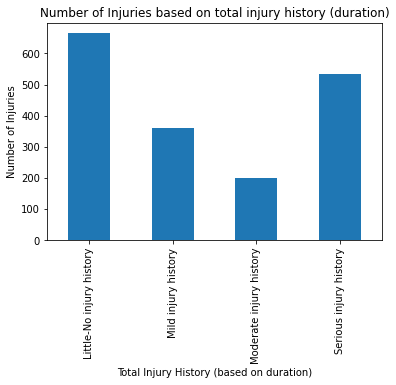

In [ ]:
df_copy = df.copy()
total_duration_numofinj = df_copy.groupby(['Total inj duration range']).size()



total_duration_numofinj = total_duration_numofinj.to_frame()
total_duration_numofinj = total_duration_numofinj.reset_index()
total_duration_numofinj_copy = total_duration_numofinj.copy()

total_duration_numofinj_plot = total_duration_numofinj.plot(x = 'Total inj duration range', y = 0, kind='bar', legend = False)


total_duration_numofinj_plot.set_xlabel('''Total Injury History (based on duration)''')
total_duration_numofinj_plot.set_ylabel('Number of Injuries')
total_duration_numofinj_plot.set_title('''Number of Injuries based on total injury history (duration)''')

Text(0.5, 1.0, 'Average Injury Duration based on total injury history (count)')

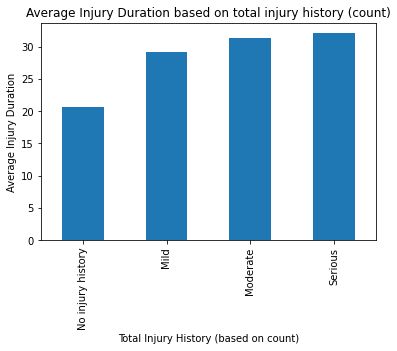

In [ ]:
df_copy = df.copy()
total_count_dur = df_copy.groupby(['Total inj count range'])['Injury Duration'].mean()


total_count_dur = total_count_dur.to_frame()
total_count_dur = total_count_dur.reset_index()
total_count_dur_copy = total_count_dur.copy()

total_count_dur.iloc[0],total_count_dur.iloc[1],total_count_dur.iloc[2] = total_count_dur_copy.iloc[2],total_count_dur_copy.iloc[0],total_count_dur_copy.iloc[1]
total_count_dur_plot = total_count_dur.plot(x = 'Total inj count range', y = 'Injury Duration', kind='bar', legend = False)






total_count_dur_plot.set_xlabel('''Total Injury History (based on count)''')
total_count_dur_plot.set_ylabel('Average Injury Duration')
total_count_dur_plot.set_title('''Average Injury Duration based on total injury history (count)''')

Text(0.5, 1.0, 'Average Injury Duration based on total injury history (duration)')

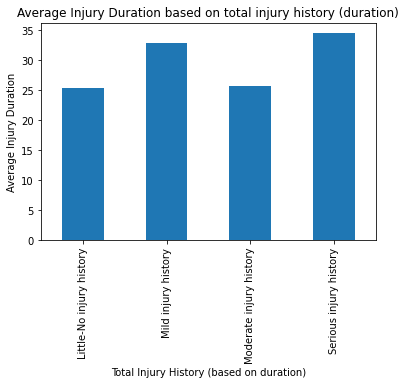

In [ ]:
df_copy = df.copy()
total_duration_dur = df_copy.groupby(['Total inj duration range'])['Injury Duration'].mean()


total_duration_dur = total_duration_dur.to_frame()
total_duration_dur = total_duration_dur.reset_index()
total_duration_dur_copy = total_duration_dur.copy()

total_duration_dur_plot = total_duration_dur.plot(x = 'Total inj duration range', y = 'Injury Duration', kind='bar', legend = False)







total_duration_dur_plot.set_xlabel('''Total Injury History (based on duration)''')
total_duration_dur_plot.set_ylabel('Average Injury Duration')
total_duration_dur_plot.set_title('''Average Injury Duration based on total injury history (duration)''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.52
Date:                Wed, 23 Jun 2021   Prob (F-statistic):            0.00120
Time:                        16:30:16   Log-Likelihood:                -9838.7
No. Observations:                1760   AIC:                         1.968e+04
Df Residuals:                    1758   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.3246      2.279     10.676      0.000      19.856      28.793
injuredbodypartcount     2.6350      0.812      3.244      0.001       1.042       4.228
==============================================================================
Omnibus:                     1494.708   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40259.076
Skew:                           3.945   Prob(JB):                         0.00
Kurtosis:                      25.062   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

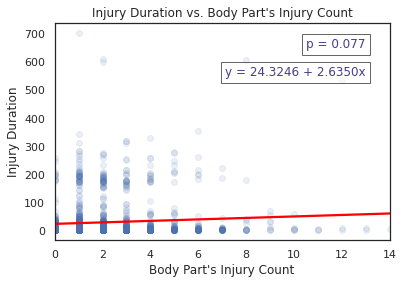

In [ ]:
#### now only focusing on the counts
df_copy = df.copy()
# remove outliers
df['injuredbodypartcount'] = df['injured body part count']
df['InjuryDuration'] = df['Injury Duration']
df['Totalnumofinj'] = df['Total num. of inj']
df['ACWR'] = df['Acute-Chronic Workload Ratio']
df['bodypartinjdurationhist']=df['injured body part history']

sns.set(style="white")
reg_plot_body = sns.regplot(x='injured body part count',y='Injury Duration',data=df_copy,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''Body Part's Injury Count''', ylabel='Injury Duration',title='''Injury Duration vs. Body Part's Injury Count''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['injured body part count'],df['Injury Duration'])[0]).round(3)))
regression_func = 'y = 24.3246 + 2.6350x'
reg_plot_body.text(13,650,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(13,550,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))

model = sm.OLS.from_formula("InjuryDuration ~ injuredbodypartcount", data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1049
Date:                Wed, 23 Jun 2021   Prob (F-statistic):              0.746
Time:                        16:30:17   Log-Likelihood:                -9843.9
No. Observations:                1760   AIC:                         1.969e+04
Df Residuals:                    1758   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.1900      2.336     12.494      0.000      24.608      33.772
Totalnumofinj     0.0878      0.271      0.324      0.746      -0.444       0.619
==============================================================================
Omnibus:                     1511.689   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41896.789
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      25.521   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

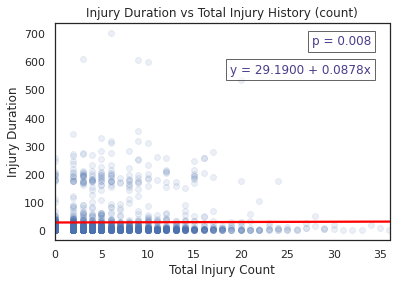

In [ ]:
sns.set(style="white")
reg_plot_total = sns.regplot(x='Total num. of inj',y='Injury Duration',data=df,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_total.set(xlabel='''Total Injury Count''', ylabel='Injury Duration',title='''Injury Duration vs Total Injury History (count)''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['Total num. of inj'],df['Injury Duration'])[0]).round(3)))

regression_func = 'y = 29.1900 + 0.0878x'

reg_plot_total.text(34,660,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_total.text(34,560,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))


model = sm.OLS.from_formula("InjuryDuration ~ Totalnumofinj", data=df)
result = model.fit()
result.summary()


In [ ]:
def get_body_part_injury_count_range_numeric(row):
  body_part_count = row['injured body part count']
  mask1 = body_part_count<1
  mask2 = body_part_count <=3
  mask3 = body_part_count <= 5
  mask4 = body_part_count>5
  if mask1:
    return 0
  elif (not mask1) and mask2:
    return 1
  elif (not mask2) and mask3:
    return 2
  elif mask4:
    return 3
df_copy['body part inj count range - tonumeric'] = df_copy.apply(lambda ro:get_body_part_injury_count_range_numeric(ro), axis=1)

def get_total_injury_count_range_numeric(row):
  body_part_count = row['Total num. of inj']
  mask1 = body_part_count<1
  mask2 = body_part_count <=3
  mask3 = body_part_count <= 5
  mask4 = body_part_count>5
  if mask1:
    return 0
  elif (not mask1) and mask2:
    return 1
  elif (not mask2) and mask3:
    return 2
  elif mask4:
    return 3
df_copy['total inj count range - tonumeric'] = df_copy.apply(lambda ro:get_total_injury_count_range_numeric(ro), axis=1)


calc_corr = df_copy['body part inj count range - tonumeric'].corr(df_copy['Injury Duration'])
print(calc_corr)

0.0677335459791574


In [ ]:
print(df['injured body part count'].mean())
print(df['injured body part count'].std())

2.0613636363636365
1.9031963072111424


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.825
Date:                Wed, 23 Jun 2021   Prob (F-statistic):            0.00112
Time:                        16:30:20   Log-Likelihood:                -9837.2
No. Observations:                1760   AIC:                         1.968e+04
Df Residuals:                    1757   BIC:                         1.970e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  25.0319      2.312     10.826      0.000      20.497      29.567
bodypartinjdurationhist     0.0433      0.025      1.764      0.078      -0.005       0.091
injuredbodypartcount        1.6684      0.979      1.704      0.089      -0.252       3.589
==============================================================================
Omnibus:                     1491.449   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39912.907
Skew:                           3.934   Prob(JB):                         0.00
Kurtosis:                      24.963   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

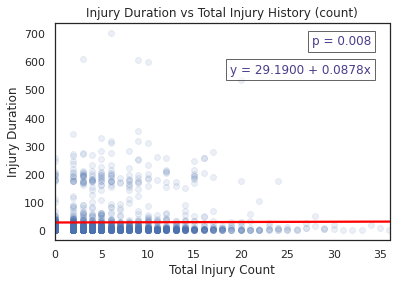

In [ ]:



sns.set(style="white")
reg_plot_total = sns.regplot(x='Total num. of inj',y='Injury Duration',data=df,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_total.set(xlabel='''Total Injury Count''', ylabel='Injury Duration',title='''Injury Duration vs Total Injury History (count)''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['Total num. of inj'],df['Injury Duration'])[0]).round(3)))

regression_func = 'y = 29.1900 + 0.0878x'

reg_plot_total.text(34,660,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_total.text(34,560,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))


model = sm.OLS.from_formula("InjuryDuration ~ bodypartinjdurationhist + injuredbodypartcount", data=df)
result = model.fit()
result.summary()
